In [3]:
import zipfile  # extrair o zip
from io import BytesIO  # reconhecer numeros binarios e converter
from PIL import Image
import matplotlib.pyplot as plt  # plotar graficos
import os  # SO do computador
import shutil  # para manipulação de arquivos e diretorios
import pandas as pd
from sklearn.preprocessing import StandardScaler  # padronizar os dados
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from os.path import join
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/redes/Untitled0.h5')

In [26]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 227, 227, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 227, 227, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 113, 113, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 113, 113, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0

In [27]:
history = pd.read_csv('/content/drive/MyDrive/redes/historico.csv')
history.head()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,1.113775,0.692526,1.332447,0.679405
1,1,0.332589,0.885188,1.573029,0.708944
2,2,0.189086,0.933523,1.830997,0.729808
3,3,0.143024,0.951259,1.816189,0.747573


<ipython-input-28-f76abefe77af>:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,50)


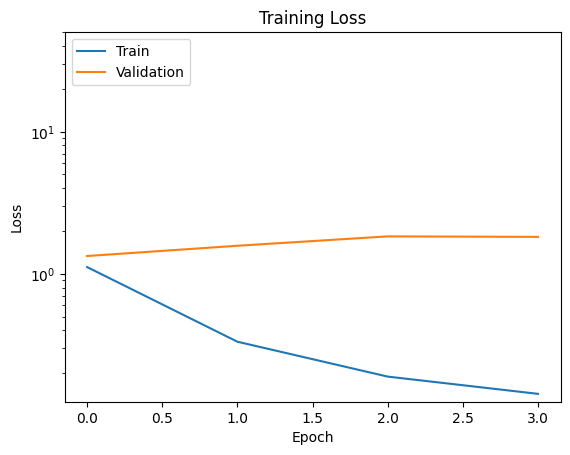

In [28]:
# Visualizar a perda durante o treinamento
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.yscale('log')
plt.ylim(0,50)
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
from google.colab import drive
#para autenticar o caminho
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
zip_path = '/content/drive/MyDrive/redes/dataSet_colorido_libras.zip'

In [34]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/redes/dataSet_colorido_libras.zip'
extract_path = '/content/dataSet_colorido_libras'

# Extrair o conteúdo do arquivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listar os arquivos no diretório de extração
extracted_files = os.listdir(extract_path)
print(f'Arquivos extraídos: {extracted_files}')


Arquivos extraídos: ['dataSet_colorido_libras']


In [35]:
for dirname, _, filenames in os.walk(
    "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train"
):
    for filename in filenames:
        print(os.path.join(dirname, filename))


bus_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/bus_renamed"
bank_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/bank_renamed"
car_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/car_renamed"
formation_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed"
hospital_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/hospital_renamed"
I_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/I_renamed"
man_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/man_renamed"
motorcycle_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/motorcycle_renamed"
my_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/my_renamed"
supermarket_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/supermarket_renamed"
we_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/we_renamed"
woman_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/woman_renamed"
you_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you_renamed"
youPlural_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/you (plural)_renamed"
your_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/your_renamed"


bus_image = os.listdir(bus_dir)
bank_image = os.listdir(bank_dir)
car_image = os.listdir(car_dir)
formation_image = os.listdir(formation_dir)
hospital_image = os.listdir(hospital_dir)
I_image = os.listdir(I_dir)
man_image = os.listdir(man_dir)
motorcycle_image = os.listdir(motorcycle_dir)
my_image =os.listdir(my_dir)
supermarket_image=os.listdir(supermarket_dir)
we_image=os.listdir(we_dir)
woman_image=os.listdir(woman_dir)
you_image=os.listdir(you_dir)
youPlural_image=os.listdir(youPlural_dir)
your_image=os.listdir(your_dir)

A saída de streaming foi truncada nas últimas 5000 linhas.
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed/formation_1605967420_3040.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed/formation_1605967420_2735.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed/formation_1605967420_2312.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed/formation_1605967420_1278.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed/formation_1605967420_1162.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed/formation_1605967420_3878.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train/formation_renamed/formation_1605967420_3288.jpeg
/content/dataSet_colorido_libras/dataSet_colorido_libras/30

In [36]:

# Making train val split (bank SIGN)
train_bank_image = bank_image[: int(0.8 * len(bank_image))]
val_bank_image = bank_image[int(0.2 * len(bank_image)) :]
test_bank_image = bank_image[int(0.2 * len(bank_image)) :]



# Making train val split (BUS SIGN)
train_bus_image = bus_image[: int(0.8 * len(bus_image))]
val_bus_image = bus_image[int(0.2 * len(bus_image)) :]
test_bus_image = bus_image[int(0.2 * len(bus_image)) :]


# Making train val split (car SIGN)
train_car_image = car_image[: int(0.8 * len(car_image))]
val_car_image = car_image[int(0.2 * len(car_image)) :]
test_car_image = car_image[int(0.2 * len(car_image)) :]


# Making train val split (car SIGN)
train_formation_image = formation_image[: int(0.8 * len(formation_image))]
val_formation_image = formation_image[int(0.2 * len(formation_image)) :]
test_formation_image = formation_image[int(0.2 * len(formation_image)) :]

# Making train val split (hospital SIGN)
train_hospital_image = hospital_image[: int(0.8 * len(hospital_image))]
val_hospital_image = hospital_image[int(0.2 * len(hospital_image)) :]
test_hospital_image = hospital_image[int(0.2 * len(hospital_image)) :]

# Making train val split (I SIGN)
train_I_image = I_image[: int(0.8 * len(I_image))]
val_I_image = I_image[int(0.2 * len(I_image)) :]
test_I_image = I_image[int(0.2 * len(I_image)) :]

# Making train val split (man SIGN)
train_man_image = man_image[: int(0.8 * len(man_image))]
val_man_image = man_image[int(0.2 * len(man_image)) :]
test_man_image = man_image[int(0.2 * len(man_image)) :]

# Making train val split (motorcycle SIGN)
train_motorcycle_image = motorcycle_image[: int(0.8 * len(motorcycle_image))]
val_motorcycle_image = motorcycle_image[int(0.2 * len(motorcycle_image)) :]
test_motorcycle_image = motorcycle_image[int(0.2 * len(motorcycle_image)) :]


# Making train val split (my SIGN)
train_my_image = my_image[: int(0.8 * len(my_image))]
val_my_image = my_image[int(0.2 * len(my_image)) :]
test_my_image = my_image[int(0.2 * len(my_image)) :]

# Making train val split (supermarket SIGN)
train_supermarket_image = supermarket_image[: int(0.8 * len(supermarket_image))]
val_supermarket_image = supermarket_image[int(0.2 * len(supermarket_image)) :]
test_supermarket_image = supermarket_image[int(0.2 * len(supermarket_image)) :]


# Making train val split (we SIGN)
train_we_image = we_image[: int(0.8 * len(we_image))]
val_we_image = we_image[int(0.2 * len(we_image)) :]
test_we_image = we_image[int(0.2 * len(we_image)) :]


# Making train val split (woman SIGN)
train_woman_image = woman_image[: int(0.8 * len(woman_image))]
val_woman_image = woman_image[int(0.2 * len(woman_image)) :]
test_woman_image = woman_image[int(0.2 * len(woman_image)) :]

# Making train val split (you SIGN)
train_you_image = you_image[: int(0.8 * len(you_image))]
val_you_image = you_image[int(0.2* len(you_image)) :]
test_you_image = you_image[int(0.2* len(you_image)) :]

# Making train val split (youPlural SIGN)
train_youPlural_image = youPlural_image[: int(0.8 * len(youPlural_image))]
val_youPlural_image = youPlural_image[int(0.2 * len(youPlural_image)) :]
test_youPlural_image = youPlural_image[int(0.2 * len(youPlural_image)) :]


# Making train val split (your SIGN)
train_your_image = your_image[: int(0.8 * len(your_image))]
val_your_image = your_image[int(0.2 * len(your_image)) :]
test_your_image = your_image[int(0.2 * len(your_image)) :]


train_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/train"
val_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/validation/validation"
test_dir = "/content/dataSet_colorido_libras/dataSet_colorido_libras/30 FPS/30 FPS/test"

In [37]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/250.,
)

val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
)

train_dataset = train_data_gen.flow_from_directory(
    train_dir, target_size=(227, 227), class_mode="categorical", color_mode="grayscale", batch_size=32
)

val_dataset = val_data_gen.flow_from_directory(
    val_dir, target_size=(227, 227), class_mode="categorical", color_mode="grayscale", batch_size=32
)

test_dataset = test_data_gen.flow_from_directory(
    test_dir, target_size=(227, 227), class_mode="categorical", color_mode="grayscale", batch_size=32
)


Found 7386 images belonging to 15 classes.
Found 3767 images belonging to 15 classes.
Found 1845 images belonging to 15 classes.


In [38]:
from sklearn.metrics import accuracy_score

# Obter as previsões do modelo no conjunto de validação
y_pred = new_model.predict(val_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obter os rótulos reais do conjunto de validação
y_true = val_dataset.classes

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Acurácia: {accuracy * 100:.2f}%')


118/118 [==============================] - 166s 1s/step
Acurácia: 31.72%
